In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras

1.15.0


In [4]:
from tensorflow.keras.models import Sequential


In [5]:
# Import all needed libraries and sublibraries

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [6]:
# Import input (x) and output (y) data, and asign these to df1 and df1

df1 = pd.read_csv('StatsVideosXALL.csv')

df2 = pd.read_csv('StatsVideosYALL.csv')

In [7]:
# Split the data into input (x) training and testing data, and ouput (y) training and testing data, 
# with training data being 80% of the data, and testing data being the remaining 20% of the data

X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [8]:
# Scale both training and testing input data

X_train = preprocessing.scale(X_train)

X_test = preprocessing.scale(X_test)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


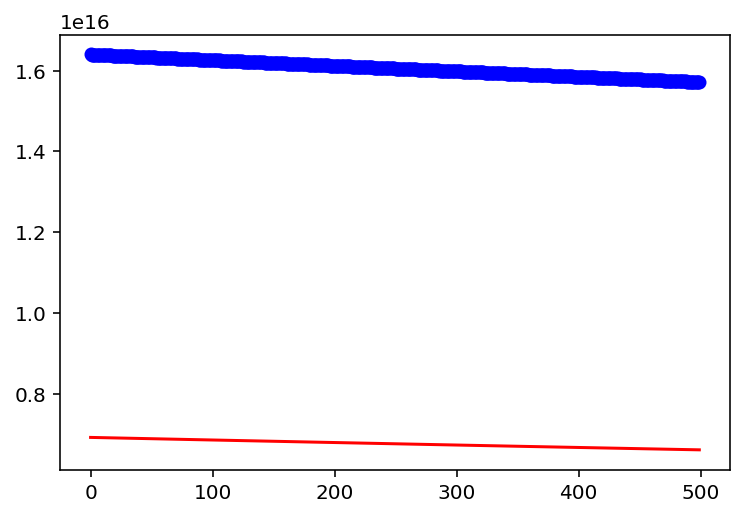

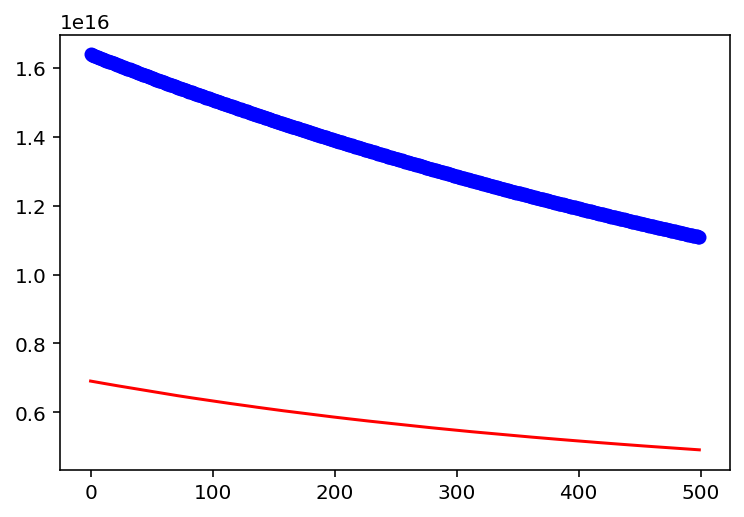

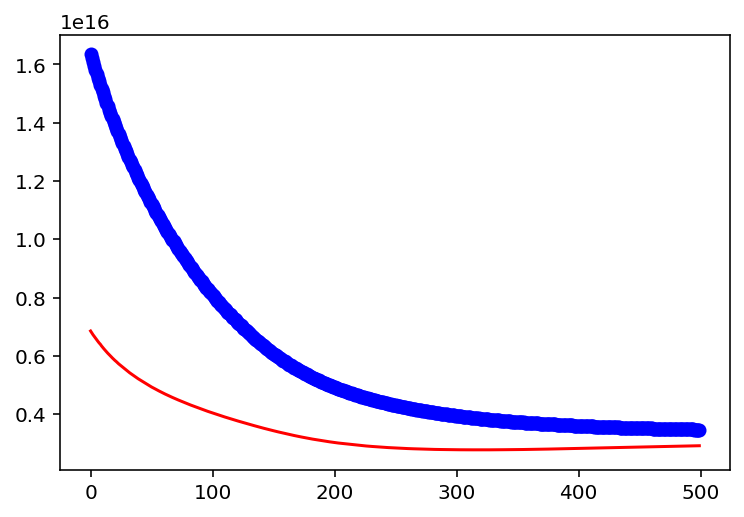

In [9]:
# Plots the results of a learning rate of 100, 1000, and 10000 respectively, with all other parameters constant

LR = [100,1000,10000]

for i in LR:
    #Defines linear regression model and its structure
    model = Sequential()
    model.add(Dense(1, input_shape=(3,)))
    
    #Compiles model
    model.compile(Adam(lr=i), 'mean_squared_error')
    
    #Fits model
    history = model.fit(X_train, y_train, epochs = 500, validation_split = 0.1,verbose = 0)
    history_dict=history.history
    
    #Plots model's training cost/loss and model's validation split cost/loss
    loss_values = history_dict['loss']
    val_loss_values=history_dict['val_loss']
    plt.figure()
    plt.plot(loss_values,'bo',label='training loss')
    plt.plot(val_loss_values,'r',label='val training loss')

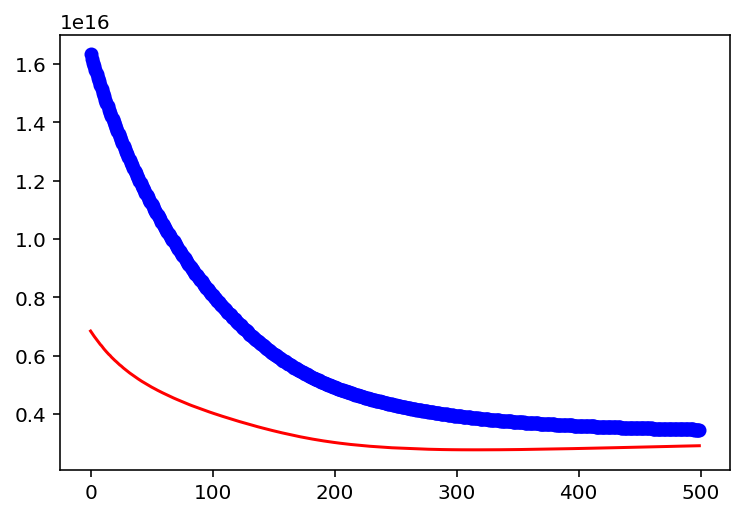

In [10]:
# Runs and plots the performance of a model with the same parameters from before (and a learning rate of 10000), 
# but now with an activation function (Relu)

model = Sequential()
model.add(Dense(1, input_shape=(3,), activation = 'relu'))
model.compile(Adam(lr=10000), 'mean_squared_error')
history = model.fit(X_train, y_train, epochs = 500, validation_split = 0.1,verbose = 0)

history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

In [11]:
# Runs model (the one with the activation function, although this doesn't really matter as they perform the same) 
# with its current weights on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.771
The R2 score on the Test set is:	0.668


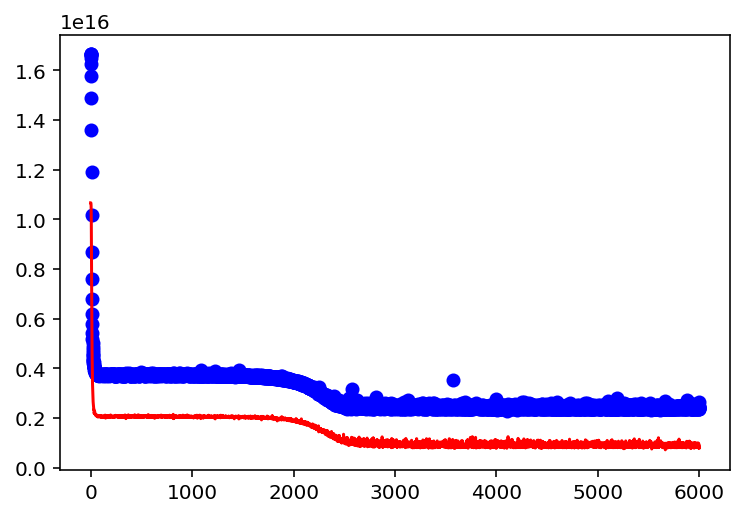

In [12]:
# Defines "deep" model and its structure
model = Sequential()
model.add(Dense(13, input_shape=(3,), activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1,))
model.compile(Adam(lr=0.003), 'mean_squared_error')

# Runs model for 2000 iterations and assigns this to 'history'
history = model.fit(X_train, y_train, epochs = 6000, validation_split = 0.2, verbose = 0)

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

Epoch 00088: early stopping
The R2 score on the Train set is:	0.773
The R2 score on the Test set is:	0.693


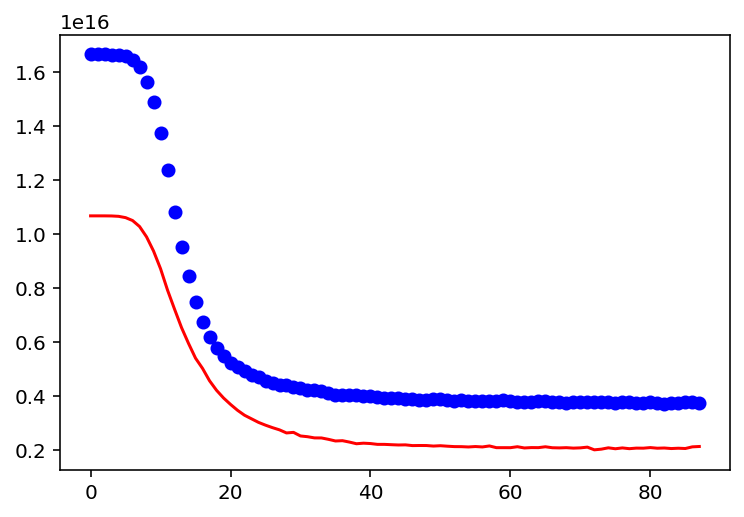

In [13]:
# Defines "deep" model and its structure
model = Sequential()
model.add(Dense(13, input_shape=(3,), activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1,))
model.compile(Adam(lr=0.003), 'mean_squared_error')

# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.2,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

# Runs model with its current weights on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

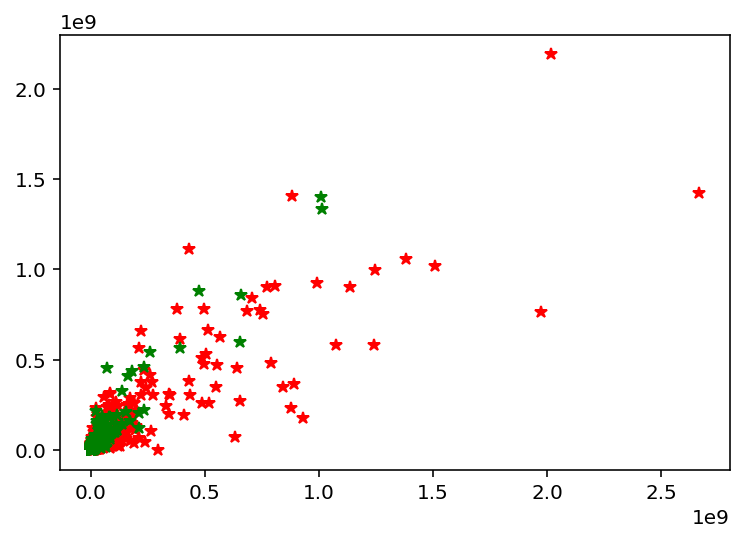

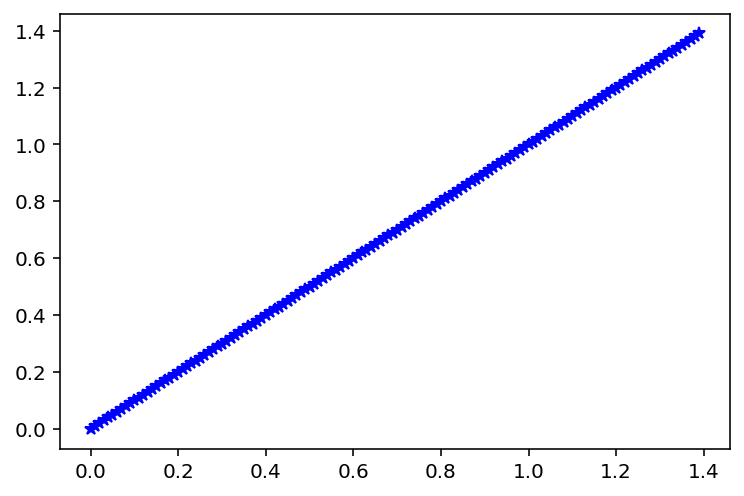

In [14]:
plt.plot(y_train, y_train_pred,'*r')
plt.plot(y_test, y_test_pred, '*g')
plt.figure()
for i in range(0,140):
    plt.plot(i/100,i/100,'*b')